In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
X_train = pd.read_csv("../raw_data/train_x.csv", delimiter=" ", index_col="Id")
y_train = pd.read_csv("../raw_data/train_y.csv", delimiter=" ", index_col="Id")
y_test = pd.read_csv("../raw_data/test_y.csv", delimiter=" ", index_col="Id")

## Dictionaries for umbrella categories

In [43]:
umbr_dict = {
    0: 'Arts & Hobbies',
    1: 'History & Religion',
    2: 'Academic - Science',
    3: 'Arts & Hobbies',
    4: 'Relationships & Children',
    5: 'Arts & Hobbies',
    6: 'Academic - Science',
    7: 'Lifestyle & Fitness',
    8: 'Arts & Hobbies',
    9: 'History & Religion',
    10: 'Academic - Science',
    11: 'Lifestyle & Fitness',
    12: 'History & Religion',
    13: 'Literature & Entertainment',
    14: 'Academic - Humanities',
    15: 'Literature & Entertainment',
    16: 'Academic - Science',
    17: 'Literature & Entertainment',
    18: 'Relationships & Children',
    19: 'Academic - Humanities',
    20: 'Academic - Pure',
    21: 'History & Religion',
    22: 'Literature & Entertainment',
    23: 'Academic - Science',
    24: 'Literature & Entertainment',
    25: 'Relationships & Children',
    26: 'Lifestyle & Fitness',
    27: 'Relationships & Children',
    28: 'Academic - Pure',
    29: 'Lifestyle & Fitness'
}

In [54]:
genre_dict = {
    'History & Religion': 1,
    'Relationships & Children': 2,
    'Academic - Science': 3,
    'Lifestyle & Fitness': 4,
    'Literature & Entertainment': 5,
    'Academic - Humanities': 6,
    'Arts & Hobbies': 7,
    'Academic - Pure': 8,
    np.nan: np.nan  # Handle missing values
}

## Umbrellas for Y_train

In [50]:
genre_dict = y_train.set_index('Genre_id')['Genre_name'].to_dict()
genre_dict_test = y_test.set_index('Genre_id')['Genre_name'].to_dict()
dict(sorted(genre_dict.items()))

{0: 'Arts & Photography',
 1: 'Biographies & Memoirs',
 2: 'Business & Money',
 3: 'Calendars',
 4: "Children's Books",
 5: 'Comics & Graphic Novels',
 6: 'Computers & Technology',
 7: 'Cookbooks, Food & Wine',
 8: 'Crafts, Hobbies & Home',
 9: 'Christian Books & Bibles',
 10: 'Engineering & Transportation',
 11: 'Health, Fitness & Dieting',
 12: 'History',
 13: 'Humor & Entertainment',
 14: 'Law',
 15: 'Literature & Fiction',
 16: 'Medical Books',
 17: 'Mystery, Thriller & Suspense',
 18: 'Parenting & Relationships',
 19: 'Politics & Social Sciences',
 20: 'Reference',
 21: 'Religion & Spirituality',
 22: 'Romance',
 23: 'Science & Math',
 24: 'Science Fiction & Fantasy',
 25: 'Self-Help',
 26: 'Sports & Outdoors',
 27: 'Teen & Young Adult',
 28: 'Test Preparation',
 29: 'Travel'}

In [51]:
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index')
genre_df = genre_df.rename(columns={
    genre_df.columns[0]: 'Genre_name'
})

genre_df = genre_df.rename_axis('Genre_id')
genre_df

,Genre_name
Genre_id,
1,Biographies & Memoirs
4,Children's Books
10,Engineering & Transportation
9,Christian Books & Bibles
26,Sports & Outdoors
11,"Health, Fitness & Dieting"
16,Medical Books
23,Science & Math
29,Travel


In [52]:
genre_df['Genre_umbr_name'] = genre_df.index.map(umbr_dict)
genre_df

,Genre_name,Genre_umbr_name
Genre_id,,
1,Biographies & Memoirs,History & Religion
4,Children's Books,Relationships & Children
10,Engineering & Transportation,Academic - Science
9,Christian Books & Bibles,History & Religion
26,Sports & Outdoors,Lifestyle & Fitness
11,"Health, Fitness & Dieting",Lifestyle & Fitness
16,Medical Books,Academic - Science
23,Science & Math,Academic - Science
29,Travel,Lifestyle & Fitness


In [56]:
genre_df['Genre_umbr_id'] = genre_df['Genre_umbr_name'].map(genre_dict)
genre_df['Genre_umbr_id'] = genre_df['Genre_umbr_id'].fillna(0).astype(int)
genre_df

,Genre_name,Genre_umbr_name,Genre_umbr_id
Genre_id,,,
1,Biographies & Memoirs,History & Religion,1
4,Children's Books,Relationships & Children,2
10,Engineering & Transportation,Academic - Science,3
9,Christian Books & Bibles,History & Religion,1
26,Sports & Outdoors,Lifestyle & Fitness,4
11,"Health, Fitness & Dieting",Lifestyle & Fitness,4
16,Medical Books,Academic - Science,3
23,Science & Math,Academic - Science,3
29,Travel,Lifestyle & Fitness,4


In [57]:
y_train_umbr = y_train[['Genre_id']].merge(genre_df, left_on='Genre_id', right_index=True).sort_index()
y_train_umbr

,Genre_id,Genre_name,Genre_umbr_name,Genre_umbr_id
Id,,,,
0,1,Biographies & Memoirs,History & Religion,1
1,4,Children's Books,Relationships & Children,2
2,10,Engineering & Transportation,Academic - Science,3
3,9,Christian Books & Bibles,History & Religion,1
4,26,Sports & Outdoors,Lifestyle & Fitness,4
...,...,...,...,...
51295,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5
51296,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5
51297,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5


In [58]:
genre_id_balance = pd.DataFrame(y_train_umbr.Genre_id.value_counts() / len(y_train_umbr))

<AxesSubplot:ylabel='Genre_id'>

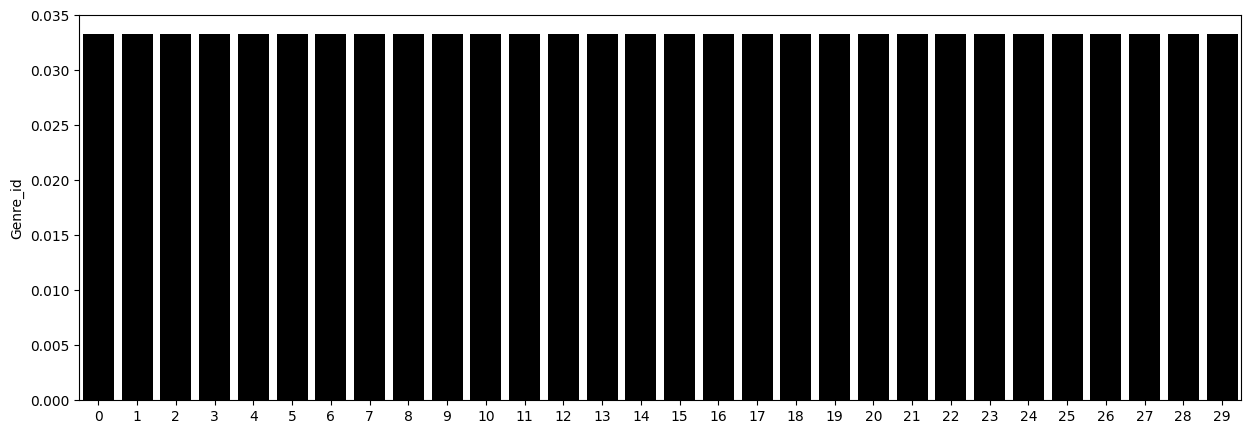

In [59]:
plt.figure(figsize=(15, 5))
sns.barplot(x = genre_id_balance.index, y= genre_id_balance.Genre_id, color='black')

In [60]:
umbrella_balance = pd.DataFrame(y_train_umbr.Genre_umbr_name.value_counts() / len(y_train_umbr))

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Academic - Science'),
  Text(1, 0, 'Literature & Entertainment'),
  Text(2, 0, 'History & Religion'),
  Text(3, 0, 'Relationships & Children'),
  Text(4, 0, 'Lifestyle & Fitness'),
  Text(5, 0, 'Arts & Hobbies'),
  Text(6, 0, 'Academic - Humanities'),
  Text(7, 0, 'Academic - Pure')])

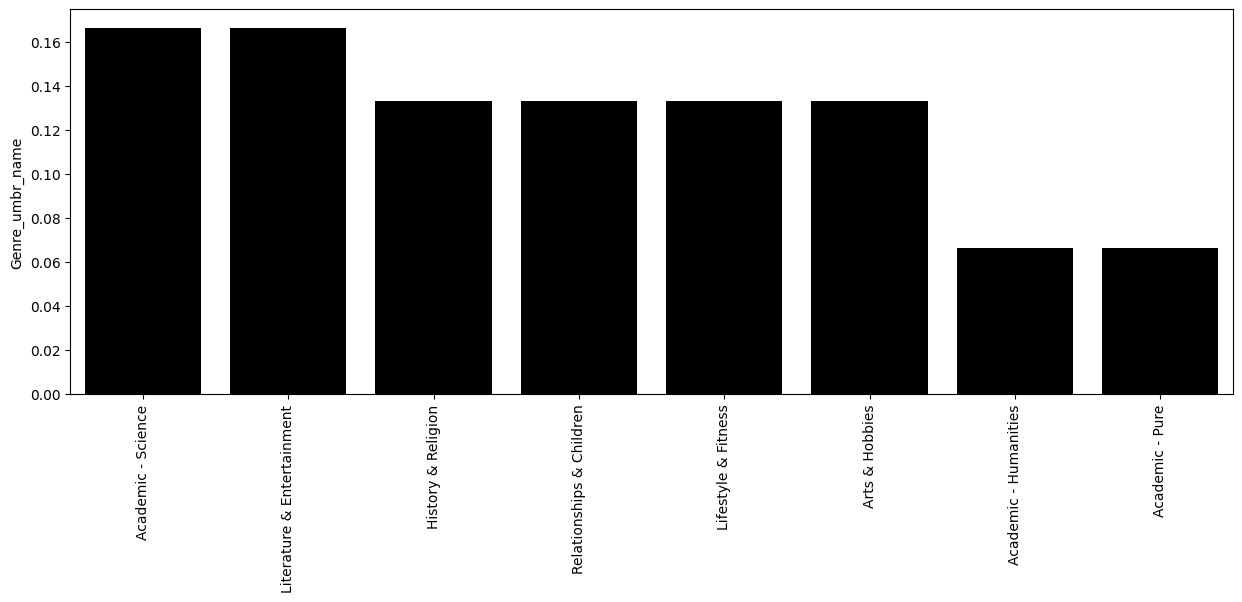

In [61]:
plt.figure(figsize=(15, 5))
sns.barplot(x = umbrella_balance.index, y= umbrella_balance.Genre_umbr_name, color='black')
plt.xticks(rotation='vertical')

## Umbrellas for Y_test

In [62]:
genre_df_test = pd.DataFrame.from_dict(genre_dict_test, orient='index')
genre_df_test = genre_df_test.rename(columns={
    genre_df_test.columns[0]: 'Genre_name'
})

genre_df_test = genre_df_test.rename_axis('Genre_id')

In [63]:
genre_df_test['Genre_umbr_name'] = genre_df_test.index.map(umbr_dict)

In [64]:
genre_df_test['Genre_umbr_id'] = genre_df_test['Genre_umbr_name'].map(genre_dict)
genre_df_test['Genre_umbr_id'] = genre_df_test['Genre_umbr_id'].fillna(0).astype(int)
genre_df_test

,Genre_name,Genre_umbr_name,Genre_umbr_id
Genre_id,,,
16,Medical Books,Academic - Science,3
28,Test Preparation,Academic - Pure,8
1,Biographies & Memoirs,History & Religion,1
21,Religion & Spirituality,History & Religion,1
0,Arts & Photography,Arts & Hobbies,7
15,Literature & Fiction,Literature & Entertainment,5
10,Engineering & Transportation,Academic - Science,3
23,Science & Math,Academic - Science,3
9,Christian Books & Bibles,History & Religion,1


In [65]:
y_test_umbr = y_test[['Genre_id']].merge(genre_df_test, left_on='Genre_id', right_index=True).sort_index()
y_test_umbr

,Genre_id,Genre_name,Genre_umbr_name,Genre_umbr_id
Id,,,,
0,16,Medical Books,Academic - Science,3
1,28,Test Preparation,Academic - Pure,8
2,1,Biographies & Memoirs,History & Religion,1
3,21,Religion & Spirituality,History & Religion,1
4,0,Arts & Photography,Arts & Hobbies,7
...,...,...,...,...
5695,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5
5696,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5
5697,17,"Mystery, Thriller & Suspense",Literature & Entertainment,5


<AxesSubplot:ylabel='Genre_id'>

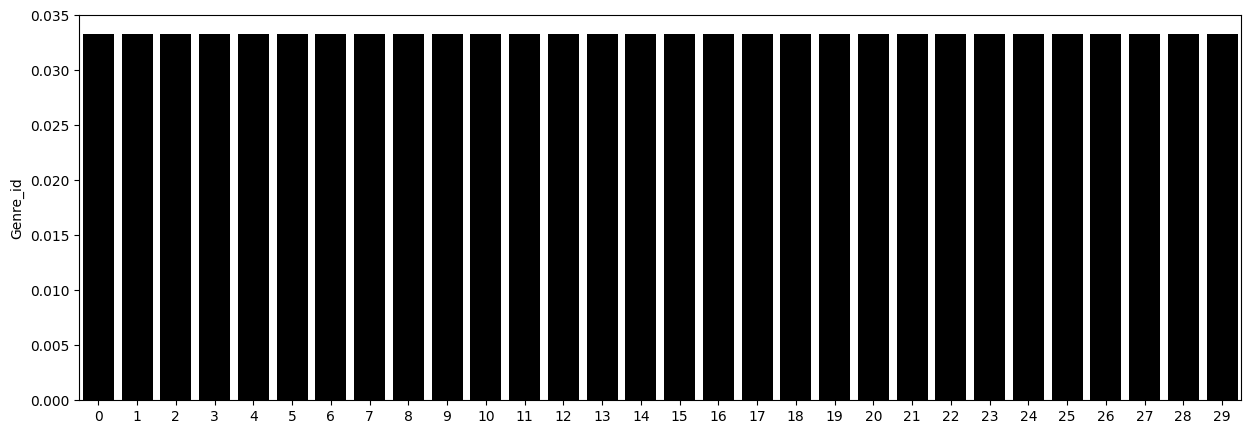

In [66]:
genre_id_balance_test = pd.DataFrame(y_test_umbr.Genre_id.value_counts() / len(y_test_umbr))
plt.figure(figsize=(15, 5))
sns.barplot(x = genre_id_balance_test.index, y= genre_id_balance_test.Genre_id, color='black')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Academic - Science'),
  Text(1, 0, 'Literature & Entertainment'),
  Text(2, 0, 'History & Religion'),
  Text(3, 0, 'Arts & Hobbies'),
  Text(4, 0, 'Relationships & Children'),
  Text(5, 0, 'Lifestyle & Fitness'),
  Text(6, 0, 'Academic - Pure'),
  Text(7, 0, 'Academic - Humanities')])

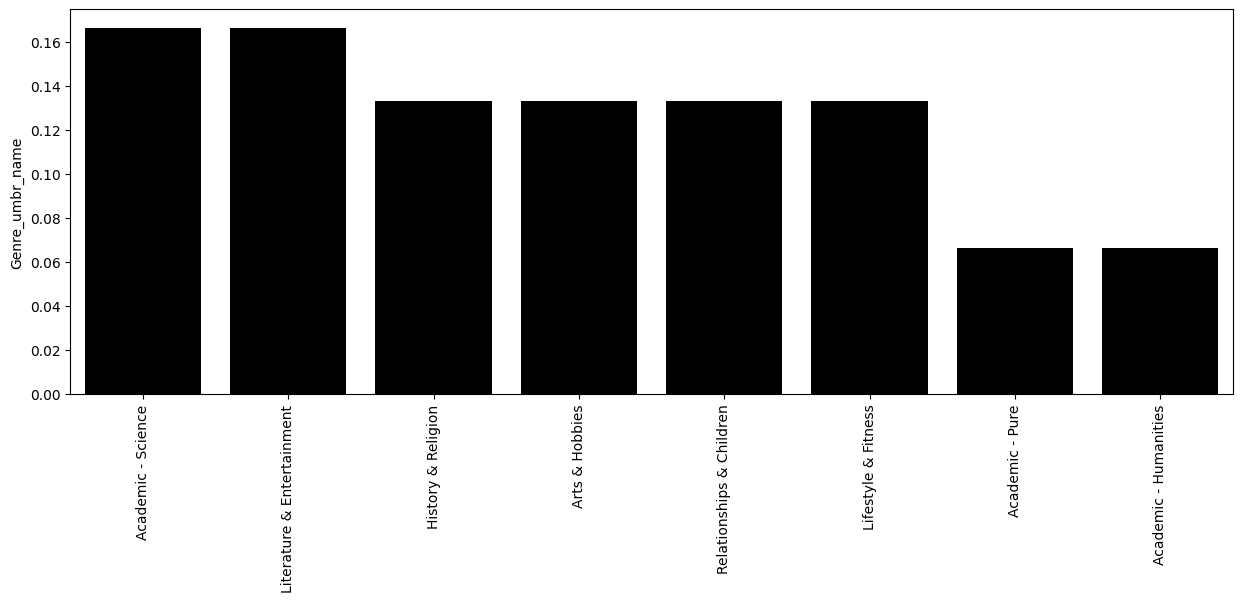

In [67]:
umbrella_balance_test = pd.DataFrame(y_test_umbr.Genre_umbr_name.value_counts() / len(y_test_umbr))
plt.figure(figsize=(15, 5))
sns.barplot(x = umbrella_balance_test.index, y= umbrella_balance_test.Genre_umbr_name, color='black')
plt.xticks(rotation='vertical')

## Save and Load y_train_umbr

In [16]:
! mkdir '../raw_data/tmp_data'

In [17]:
# Save y_train_umbr
file_path = '../raw_data/tmp_data/y_train_umbr.npy'
np.save(file_path, y_train_umbr)

In [19]:
loaded_data = np.load(file_path, allow_pickle=True)

In [68]:
# Save y_test_umbr
file_path = '../raw_data/tmp_data/y_test_umbr.npy'
np.save(file_path, y_test_umbr)